# Stanford Car Dataset: Vehicle Classification


In recent years the role of Automotive E-Commerce has increased significantly. It is estimated that more than 1 million vehicles are sold online each year. However, along with the increase in market share, there has been a sharp increase in fraud posts. In the United Kingdom, in 2020, there were more than 70,000 reported cases of fraud posts, with victims losing an estimated $80million (Murray, 2020). Usually, such posts contain inconsistencies, e.g., the images they upload do not correspond to the car information.

Using advanced machine learning techniques appropriate for image recognition, we can help solve the challenge mentioned above.

**Goal**: This project aims to build a model that classifies a car's make and model given an image.

## Dataset

We will be using [The Stanford Cars Dataset](https://www.kaggle.com/jessicali9530/stanford-cars-dataset), an extensive collection of
vehicle images. It consists of 16,185 total images labeled with 196 classes based on the car’s Make/Model/Year (e.g., Mercedes C class 2009). The data is split into 8,144 training images and 8,041 testing images (roughly 50-50% train-test split), so each class of car has around 40 images in the training set and the same amount in the testing set as well.

**Importing necessary libraries**

In [1]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## deep learning
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

## Data Import

Data is being imported from my google drive folder. The link to the data: https://drive.google.com/drive/folders/19yBRIajHp1CI1Bz3lGSUpNp0kP3NDZ8z?usp=sharing

In [2]:
#drive.mount('/content/drive')
from google.colab import drive

# Attempt to mount the drive, handling potential errors
try:
    drive.mount('/content/drive')
except ValueError:
    # If mounting fails, print a helpful message
    print("Drive mounting failed. Please ensure you are connected to the internet and have authorized Colab to access your Google Drive.")
    # You can try re-running this cell or restarting the runtime

Mounted at /content/drive


In [3]:
## loading the data
train_car = glob("/content/drive/My Drive/car_data-20241028T111111Z-001/car_data/train/*/*")
test_car = glob("/content/drive/My Drive/car_data-20241028T111111Z-001/car_data/test/*/*")

## Data Exploration

The functions below extract make, model and the year of the car and plots its image for both training and testing set.

Next, we will create a dataframe which contains 3 columns:

- Cars: Contains all the information about each car (Make/Model/Year).
- Make: Just gives the make of the car.
- Year: gives the production year of a given car.

Furthermore, I create a couple of barplots for the make and year columns. Based on those plots, we can see how the data is distributed. E.g. which make of the car has most images in the dataset.



**Feature Engineering on the dataset:**

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[48::][:-9]
  return car_class

def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[47::][:-9]
  return car_class

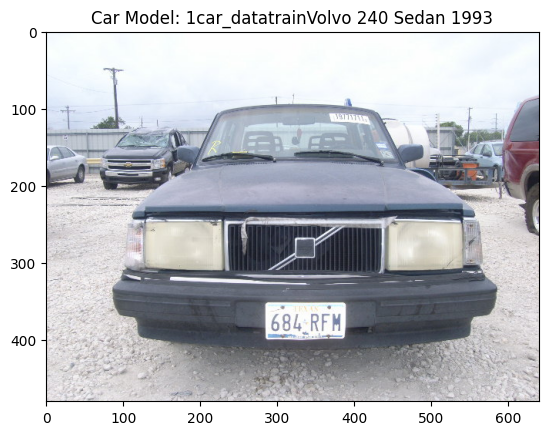

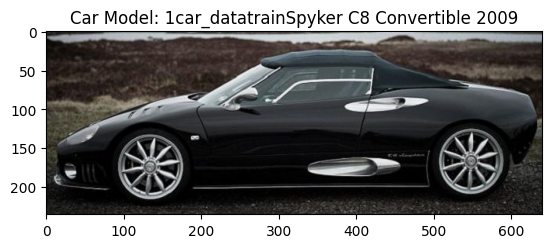

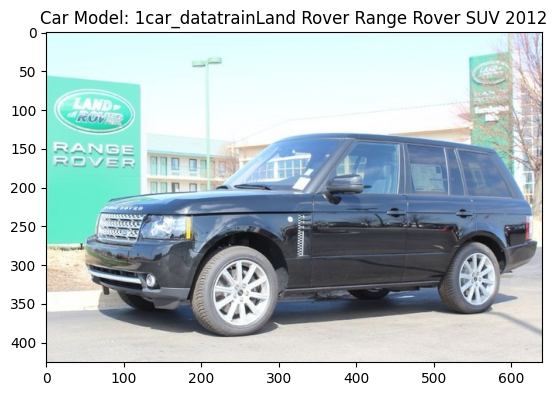

In [5]:
## showing some car images and their classes
for i in range(1,2100,700):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [6]:
y_train = []
y_test = []

for i in range(len(train_car)):
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    y_test.append(get_test_car_class(test_car[i]))

In [7]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,1car_datatrainVolvo 240 Sedan 1993,1car_datatrainVolvo,1993
1,1car_datatrainVolvo 240 Sedan 1993,1car_datatrainVolvo,1993
2,1car_datatrainVolvo 240 Sedan 1993,1car_datatrainVolvo,1993
3,1car_datatrainVolvo 240 Sedan 1993,1car_datatrainVolvo,1993
4,1car_datatrainVolvo 240 Sedan 1993,1car_datatrainVolvo,1993
...,...,...,...
8193,1car_datatrainAcura TL Type-S 2008,1car_datatrainAcura,2008
8194,1car_datatrainAcura TL Type-S 2008,1car_datatrainAcura,2008
8195,1car_datatrainAcura TL Type-S 2008,1car_datatrainAcura,2008
8196,1car_datatrainAcura TL Type-S 2008,1car_datatrainAcura,2008


In [8]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]

In [9]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())

In [10]:
df_train_labels.to_csv(f'/content/drive/My Drive/car_data-20241028T111111Z-001/car_data/training_labels.csv')
df_test_labels.to_csv(f'/content/drive/My Drive/car_data-20241028T111111Z-001/car_data/testing_labels.csv')

**Creating barplots for Car's make and year of production**

<ipython-input-12-28dcac55af9e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data=df_train_labels, order=df_train_labels['Make'].value_counts().index, palette="Spectral")
<ipython-input-12-28dcac55af9e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data=df_test_labels, order=df_test_labels['Make'].value_counts().index, palette="Spectral")


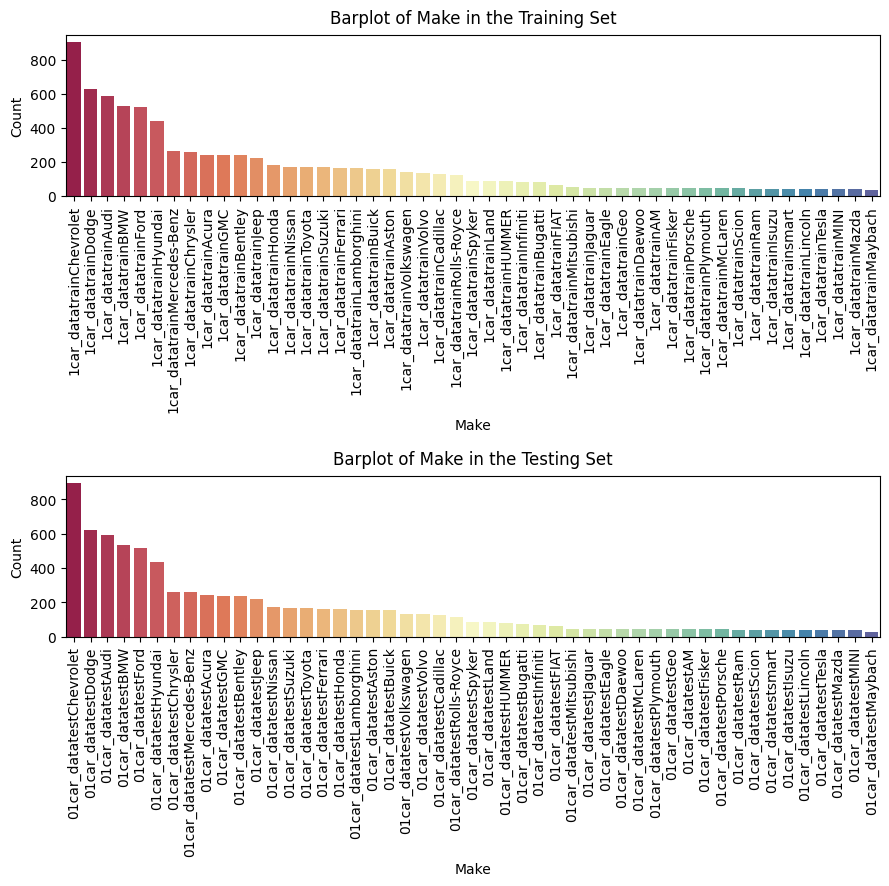

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

# The 'x' argument should be the column name, and 'data' should be the DataFrame.
sns.countplot(x='Make', data=df_train_labels, order=df_train_labels['Make'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Training Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
# Similar change for the second subplot.
sns.countplot(x='Make', data=df_test_labels, order=df_test_labels['Make'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Testing Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90), plt.tight_layout()
plt.show()

<ipython-input-17-6480fa4a2ffc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df_train_labels[df_train_labels['Year'].isin(top_15_years)], order=top_15_years, palette="Spectral")


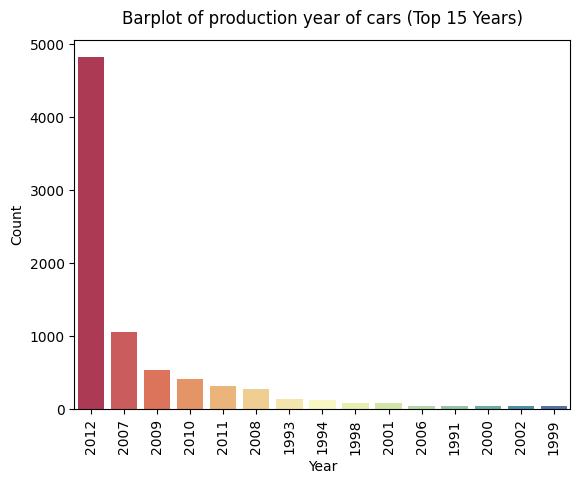

In [17]:
top_15_years = df_train_labels['Year'].value_counts().nlargest(15).index
sns.countplot(x='Year', data=df_train_labels[df_train_labels['Year'].isin(top_15_years)], order=top_15_years, palette="Spectral")
plt.title('Barplot of production year of cars (Top 15 Years)', y=1.02)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Traditional Machine Learning Models


First, I will try to use traditional (or more conventional) machine learning techniques to build the classification model. I plan to use:
- Logistic Regression with PCA
- Support Vector Machines with RBF (SVMs)
- Random Forests

### Data Pre-processing

In order to use these images, first I had to resize all of them in the same format (128x128 pixels) and then I had to express them in a numerical form. Thus, I converted each image in the dataset into a NumPy array of RGB pixels.

In [18]:
## we will processes all photos down to 128 pixels
## both in width and length
img_size = (128,128)

## we will store in this list resized images
resized_images = []

def image_to_np_array(file):
    """
    This function takes a filename
    1. opens it as a photo
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())

    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [19]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)):
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i]))

KeyboardInterrupt: 

In [ ]:
## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_test_car_class(test_car[i]))

**Linear SVC with PCA**

PCA is a dimensionality-reduction technique (unsupervised technique), so we can use it when we have a dataset with several dimensions. We want to find the most important dimensions that help us most to explain the data. On the top of PCA, we added a Logistic Regression (or a Linear SVM) that helps with classification.

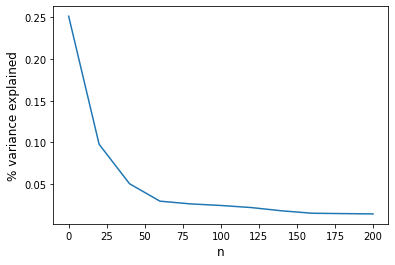

In [ ]:
## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0,201,20)), pca.explained_variance_ratio_[:11],
label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

In [ ]:
## conducting PCA with 140 principle components
n_comp = 150
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:150]))

0.8521911462105871


In [ ]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C = 1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_PCA.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training data: 0.758232
Accuracy on testing data: 0.045153


**Support Vector Machines - RBF Kernel**

Support Vector Machines (SVMs) are supervised learning models that can be used for classification and regression analysis. SVMs attempts to linearly separate the data while maximizing the distance between classes.


In [ ]:
## creating a function which will fit the model on the training data
## and report the accuracy rates

def SVM_evaluation(X_train, y_train, X_test, y_test, clf):
    ## fitting the training data to SVC model
    clf.fit(X_train, y_train)
    ## predicting training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train_pred, y_train)
    test_accuracy = accuracy_score(y_test_pred, y_test)

    print("Accuracy on training data:", train_accuracy)
    print("Accuracy on testing data:", test_accuracy)
    return None # train_accuracy, test_accuracy

In [ ]:
#Creating my model
clf_rbf = SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")
SVM_evaluation(X_train,y_train, X_test, y_test, clf_rbf)

SVM with a RBF kernel:
Accuracy on training data: 1.0
Accuracy on testing data: 0.05473204104903079


**Random Forest**

Random Forests are one of the most generalizable algorithms for classification tasks. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. Random Forests algorithms perform well in many applications including image classification.

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=50)
randomforest.fit(X_train, y_train)

ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 0.994
Test Score for the Random Forest Classifier: 0.148


In [ ]:
randomforest2 = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5, random_state=333)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf-0.03458))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf-0.0125))

Train Score for the Random Forest Classifier: 0.960
Test Score for the Random Forest Classifier: 0.136


In [ ]:
print(classification_report(y_test, randomforest.predict(X_test)))

                                          precision    recall  f1-score   support

                    Acura TL Type-S 2008       0.16      0.19      0.17        42
          Aston Martin Virage Coupe 2012       0.42      0.39      0.41        38
                Audi S5 Convertible 2012       0.16      0.12      0.14        42
           BMW 6 Series Convertible 2007       0.14      0.11      0.12        44
                         BMW X5 SUV 2007       0.21      0.22      0.22        41
             Bentley Mulsanne Sedan 2011       0.15      0.09      0.11        35
          Bugatti Veyron 16.4 Coupe 2009       0.13      0.12      0.12        43
       Chevrolet Camaro Convertible 2012       0.06      0.05      0.05        44
           Ferrari 458 Italia Coupe 2012       0.22      0.19      0.21        42
               GMC Yukon Hybrid SUV 2012       0.16      0.14      0.15        42
                HUMMER H3T Crew Cab 2010       0.24      0.18      0.21        39
               

## Deep Learning

To build the model, we decided to use Convolutional Neural Networks since they are
known to be one of the most effective types of neural networks for image classification. Next, we will build different models to classify car dataset and then evaluate their
performance

### Data pre-processing

Given that humans took images in our dataset, there is no specific angle or order on how pictures were taken. There is high variability in images in the dataset, and working with such a dataset can be tricky. To avoid such problems, we performed data augmentation, which is a technique that increases the diversity of the dataset by applying random transformations. Also, for all images, we selected the standard size of 224x224x3.

In [ ]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
## there are 196 different models
n_classes = len(model_names)
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
## getting the path to the data
train_path = "/content/drive/My Drive/Colab Notebooks/car_data/train/"
test_path = "/content/drive/My Drive/Colab Notebooks/car_data/test/"

In [ ]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8040 images belonging to 196 classes.


# Transfer Learning

Transfer learning is a process where you take an existing trained model. In this project, we used three different models MobileNet V2, VGG16 and EfficientNet B1.



## VGG16

This convolutional neural network contains 16 layers. It has achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

In [ ]:
## use pre-trained VGG16 model
## the model was not accepting different image sizes with imagenet weights
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# mark loaded layers as not trainable
for layer in vgg16_model.layers:
    layer.trainable = False


x = Flatten()(vgg16_model.layers[-1].output)
x = Dense(196, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

## define the new model
model = Model(inputs=vgg16_model.inputs, outputs=output)
## adding a last layers with 196 classes

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
## compile model, define optimizer and the loss function
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                            validation_data=validation_generator,
                        validation_steps=len(train_generator), epochs=20)

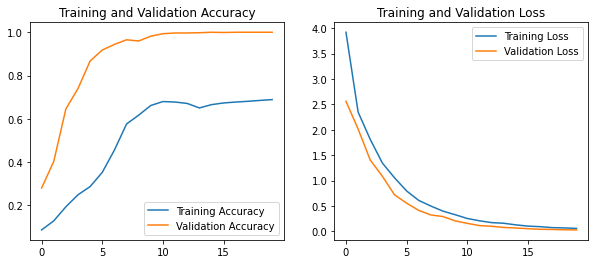

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Mobile Net V2

MobileNet-v2 is a convolutional neural network that contains 53 layers. This network has been trained  on more than a million images from the ImageNet database and it can classify objects into more than a 1000 categories. This CNN has been optimized to perform well on mobile devices.


In [ ]:
## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                                    weights='imagenet',
                                    input_shape=(224, 224, 3))

## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=196, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
## in case you want to see the model summary
##model_1.summary()

In [ ]:
## compile the model, define optimizer and the loss function
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])

In [ ]:
## train the model
history_1 = model_1.fit_generator(train_generator,
                           steps_per_epoch=len(train_generator),
                           validation_data=validation_generator,
                          validation_steps=len(validation_generator), epochs=20)

Epoch 1/20
255/255 [==============================] - 214s 840ms/step - loss: 15.2798 - accuracy: 0.0592 - val_loss: 13.8995 - val_accuracy: 0.1210
Epoch 2/20
255/255 [==============================] - 211s 828ms/step - loss: 12.6481 - accuracy: 0.2229 - val_loss: 12.1599 - val_accuracy: 0.2077
Epoch 3/20
255/255 [==============================] - 211s 827ms/step - loss: 10.8491 - accuracy: 0.3777 - val_loss: 10.8359 - val_accuracy: 0.2599
Epoch 4/20
255/255 [==============================] - 211s 827ms/step - loss: 9.3964 - accuracy: 0.4838 - val_loss: 9.7350 - val_accuracy: 0.3000
Epoch 5/20
255/255 [==============================] - 211s 827ms/step - loss: 8.1648 - accuracy: 0.5861 - val_loss: 8.8061 - val_accuracy: 0.3258
Epoch 6/20
255/255 [==============================] - 212s 829ms/step - loss: 7.1260 - accuracy: 0.6528 - val_loss: 8.0209 - val_accuracy: 0.3442
Epoch 7/20
255/255 [==============================] - 211s 827ms/step - loss: 6.2459 - accuracy: 0.7167 - val_loss: 7.

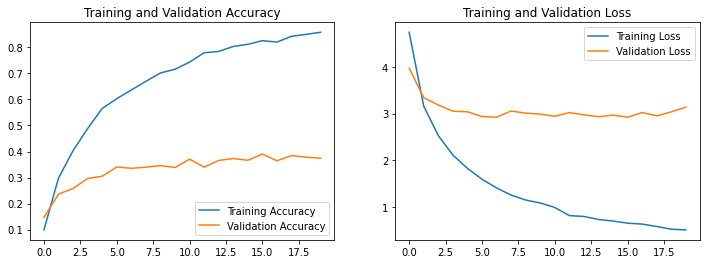

In [ ]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## EfficientNet B1

EfficientNet is among the most efficient models Also, this network has been pre-trained on the ImageNet database, but it is considered to be one the most efficient models. In comparsion with other CNNs, EfficientNet use a method called compound scaling, which uniformly scales all dimensions of depth/width/resolution while maintaingn the balance (ref). That reduces significantly the the dimensions of the classification problems.

In [ ]:
## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(196, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


# model_2.summary()

27033600/27018416 [==============================] - 1s 0us/step


In [ ]:
## compile model, define optimizer and the loss function
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [ ]:
## train the model
history_2 = model_2.fit_generator(generator=train_generator,
                    steps_per_epoch=len(train_generator) ,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=20)

Epoch 1/20
255/255 [==============================] - 206s 807ms/step - loss: 4.7295 - accuracy: 0.0905 - val_loss: 3.8548 - val_accuracy: 0.2104
Epoch 2/20
255/255 [==============================] - 202s 790ms/step - loss: 3.0157 - accuracy: 0.3692 - val_loss: 2.6637 - val_accuracy: 0.3934
Epoch 3/20
255/255 [==============================] - 201s 789ms/step - loss: 1.9686 - accuracy: 0.5624 - val_loss: 2.0400 - val_accuracy: 0.5106
Epoch 4/20
255/255 [==============================] - 201s 787ms/step - loss: 1.3963 - accuracy: 0.6795 - val_loss: 1.6762 - val_accuracy: 0.5834
Epoch 5/20
255/255 [==============================] - 202s 791ms/step - loss: 1.0631 - accuracy: 0.7491 - val_loss: 1.4870 - val_accuracy: 0.6157
Epoch 6/20
255/255 [==============================] - 201s 788ms/step - loss: 0.8484 - accuracy: 0.7978 - val_loss: 1.3790 - val_accuracy: 0.6410
Epoch 7/20
255/255 [==============================] - 201s 786ms/step - loss: 0.6741 - accuracy: 0.8426 - val_loss: 1.3045 -

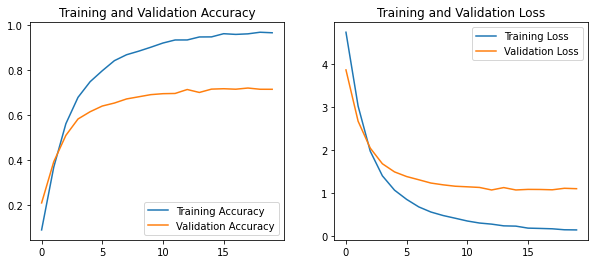

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model predictions

This function selects images from the testing datasets, inputs them in the model that we created and returns the perdiction about what car is in the image. Also, it plots the image of the car, so someone can see if the prediction is true or false.

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +\
              'predicted: ' + predicted + ' with probability of: '\
               + str(val_pred)[:4])
        plt.imshow(image)

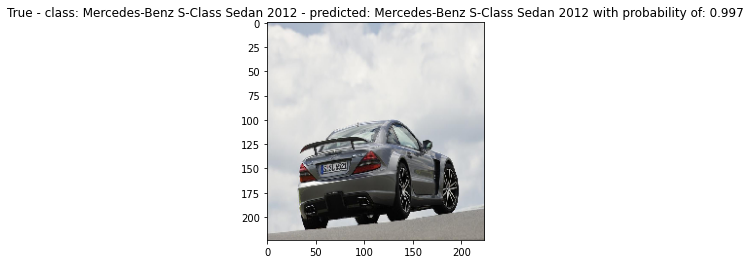

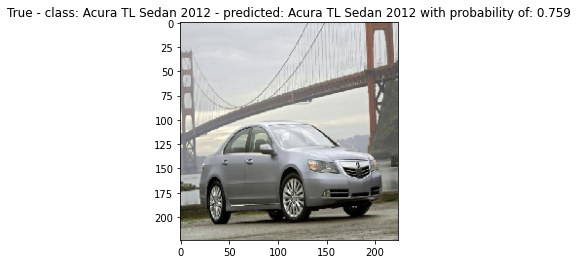

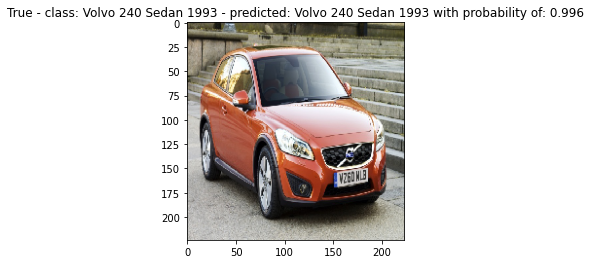

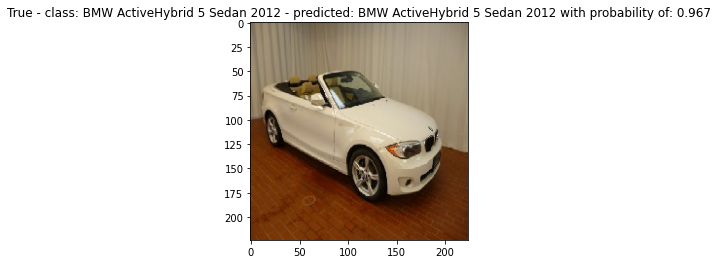

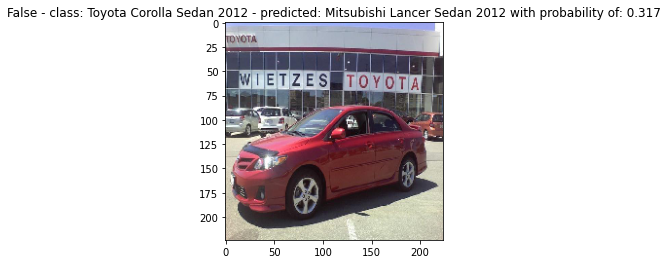

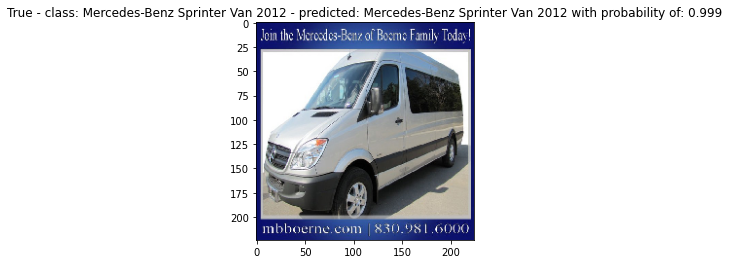

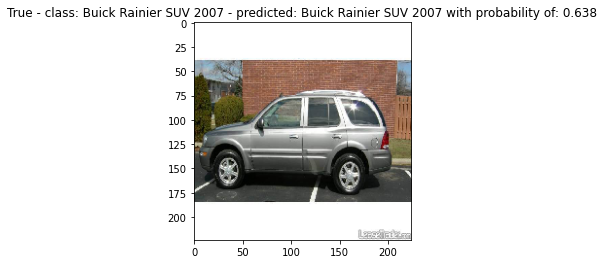

In [ ]:
## making prediction about different car models
predict_class(model_2)

## Comparsion of the networks above

Comparing the results that we obtained from different models.

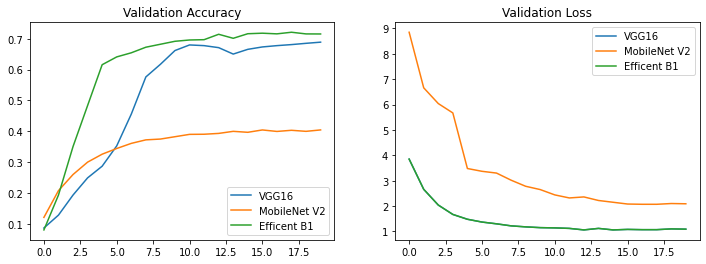

In [ ]:
epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, val_acc, label='VGG16')
plt.plot(epochs_range, val_acc_1, label='MobileNet V2')
plt.plot(epochs_range, val_acc_2, label='Efficent B1')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='VGG16')
plt.plot(epochs_range, val_loss_1, label='MobileNet V2')
plt.plot(epochs_range, val_loss_2, label='Efficent B1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()